## Set Environment

In [35]:
library(tidyverse)
library(MASS)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



## Generate Dataset from Gaussian Mixed Model (GMM)

In [83]:
fun_gau = function(n, mu, sig2, label_cluster){
    ### dataset from the first model
    x = mvrnorm(n, mu, sig2)  %>% as.data.frame
    colnames(x) = c("X1", "X2")
    x$Z = label_cluster
    return(x)
}

fun_gmm = function(ns, mus, sig2, label_sample){
    ids = 1:length(ns)
    dat = lapply(ids, function(idx){fun_gau(ns[idx], mus[idx,], sig2, idx)})
    dat = do.call(bind_rows, dat)
    dat$C = label_sample
    return(dat)
}

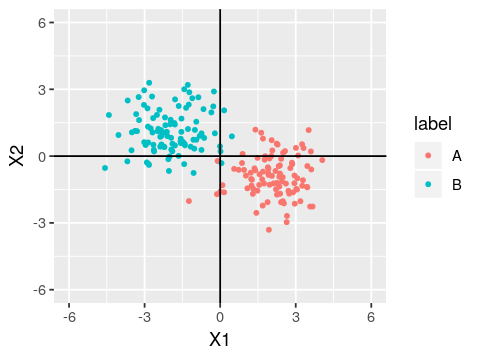

In [74]:
options(repr.plot.width=4, repr.plot.height=3)

set.seed(123)
sig2 = matrix(c(1,0,0,1),2,2)
mat1  = fun_gau(100, c( 2, -1), sig2, "A")
mat2  = fun_gau(100, c(-2,  1), sig2, "B")
mat   = bind_rows(mat1, mat2)

gp = mat %>% 
    as.data.frame %>%
    ggplot(aes(x=X1, y=X2, color=label)) +
    geom_point(size=1) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    xlim(c(-6, 6)) +
    ylim(c(-6, 6))
print(gp)

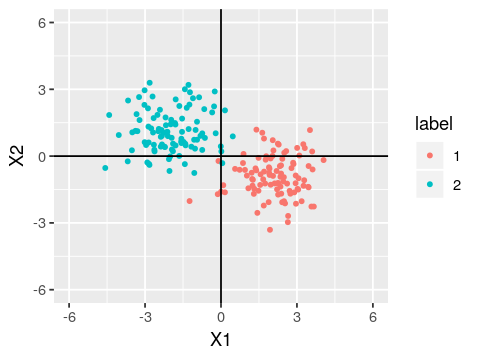

In [77]:
options(repr.plot.width=4, repr.plot.height=3)

set.seed(123)
sig2 = matrix(c(1,0,0,1),2,2)

ns  = c(100, 100)
mus = rbind(c( 2, -1), c(-2,  1))
mat = fun_gmm(ns, mus, sig2) %>% mutate(label = as.character(label))

gp = mat %>% 
    as.data.frame %>%
    ggplot(aes(x=X1, y=X2, color=label)) +
    geom_point(size=1) +
    geom_vline(xintercept=0) +
    geom_hline(yintercept=0) +
    xlim(c(-6, 6)) +
    ylim(c(-6, 6))
print(gp)

In [92]:
### make a small shift from the first model
delta = matrix(c(
    0.5, 0.5,
   -0.5, 0.5,
    0.5,-0.5), 3, 2, byrow=TRUE)

### mean/center of total
mu = matrix(c(
    0, 0,
    3, 3,
    0, 3), 3, 2, byrow=TRUE)

### mean/center of the first  model
### mean/center of the second model
mu1 = mu
mu2 = mu + delta

### cov matrix
sig2 = matrix(c(1,0,0,1),2,2)

### number of cells
ns = c(100, 850, 50)

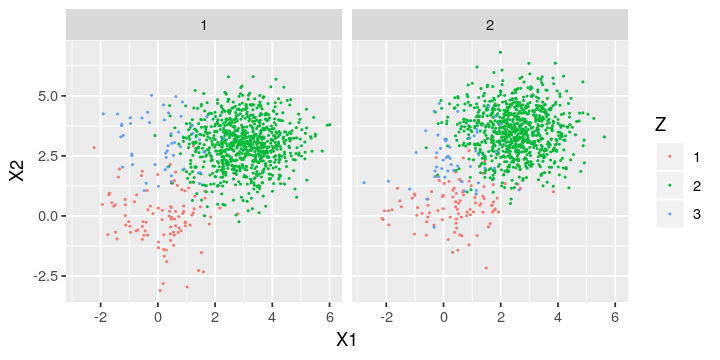

In [95]:
options(repr.plot.width=6, repr.plot.height=3)

mat1 = fun_gmm(ns, mu1, sig2, 1)
mat2 = fun_gmm(ns, mu2, sig2, 2)
mat  = bind_rows(mat1, mat2)

gp = mat %>% 
    as.data.frame %>% 
    mutate(Z = as.character(Z)) %>%
    ggplot(aes(x = X1, y = X2, color = Z)) + 
        geom_point(size = 0.2) +
        facet_wrap(~ C)
print(gp)

In [96]:
head(mat)

X1,X2,Z,C
-0.2618815,0.4084528,1,1
-2.2270370,2.8461591,1,1
0.6201335,1.8212294,1,1
-1.1323951,0.4615730,1,1
0.6186840,0.1864937,1,1
0.8387567,1.0960706,1,1


In [98]:
Y = mat[,c("X1", "X2")]
C = mat[,c("C"), drop=FALSE]
colnames(C) = 
print(head(Y))
print(head(C))

          X1        X2
1 -0.2618815 0.4084528
2 -2.2270370 2.8461591
3  0.6201335 1.8212294
4 -1.1323951 0.4615730
5  0.6186840 0.1864937
6  0.8387567 1.0960706
  C
1 1
2 1
3 1
4 1
5 1
6 1


In [103]:
write_delim(
    Y,
    path  = "Y.txt",
    delim = "\t",
    col_names = TRUE)

In [104]:
write_delim(
    C,
    path  = "C.txt",
    delim = "\t",
    col_names = TRUE)